In [1]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
!git clone https://github.com/sumitsarkar1/sumitEVA7.git

Cloning into 'sumitEVA7'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 47 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), 22.45 KiB | 2.25 MiB/s, done.


In [3]:
import os
os.chdir('./sumitEVA7/')

In [4]:
!tree

.
├── main.py
├── models
│   └── resnet.py
├── pytorch_grad_cam
│   ├── ablation_cam.py
│   ├── activations_and_gradients.py
│   ├── base_cam.py
│   ├── eigen_cam.py
│   ├── eigen_grad_cam.py
│   ├── fullgrad_cam.py
│   ├── grad_cam_plusplus.py
│   ├── grad_cam.py
│   ├── guided_backprop.py
│   ├── __init__.py
│   ├── layer_cam.py
│   ├── score_cam.py
│   ├── utils
│   │   ├── find_layers.py
│   │   ├── image.py
│   │   ├── __init__.py
│   │   └── svd_on_activations.py
│   └── xgrad_cam.py
├── README.md
└── utils.py

3 directories, 21 files


In [5]:
from sumitEVA7 import main

epochs = main.setNumberofepochs(20)
batch_size = main.setBatchSize(128)

net = main.getModel()
net = net.to(device)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/home/rogbot/deepvision/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:689: FutureWarning: This class has been deprecated. Please use CoarseDropout
  warnings.warn(


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified
Number of epochs set to =  20
Batch Size set to =  128


In [6]:
from torchsummary import summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [7]:
optim = main.setOptimizer(net)
scheduler = main.setScheduler(optim)

In [8]:
for epoch in range(epochs):
    print("EPOCH:", epoch)
    main.train(net, epoch, optim)
    main.test(net, epoch)
    scheduler.step()

EPOCH: 0


Loss=1.2954986095428467 Batch_id=390 Train Accuracy=48.26: 100%|█| 391/391 [01:3


Accuracy of the network on the 10000 test images: 60 %
EPOCH: 1


Loss=0.8929375410079956 Batch_id=390 Train Accuracy=66.83: 100%|█| 391/391 [01:4


Accuracy of the network on the 10000 test images: 70 %
EPOCH: 2


Loss=0.5826903581619263 Batch_id=390 Train Accuracy=74.86: 100%|█| 391/391 [01:4


Accuracy of the network on the 10000 test images: 76 %
EPOCH: 3


Loss=0.5895476341247559 Batch_id=390 Train Accuracy=79.27: 100%|█| 391/391 [01:4


Accuracy of the network on the 10000 test images: 72 %
EPOCH: 4


Loss=0.4873294234275818 Batch_id=390 Train Accuracy=83.02: 100%|█| 391/391 [01:4


Accuracy of the network on the 10000 test images: 75 %
EPOCH: 5


Loss=0.38359206914901733 Batch_id=390 Train Accuracy=85.72: 100%|█| 391/391 [01:


Accuracy of the network on the 10000 test images: 80 %
EPOCH: 6


Loss=0.5220435857772827 Batch_id=390 Train Accuracy=87.99: 100%|█| 391/391 [01:5


Accuracy of the network on the 10000 test images: 81 %
EPOCH: 7


Loss=0.3492822051048279 Batch_id=390 Train Accuracy=89.88: 100%|█| 391/391 [01:4


Accuracy of the network on the 10000 test images: 79 %
EPOCH: 8


Loss=0.21305596828460693 Batch_id=390 Train Accuracy=91.18: 100%|█| 391/391 [01:


Accuracy of the network on the 10000 test images: 80 %
EPOCH: 9


Loss=0.32236966490745544 Batch_id=390 Train Accuracy=92.48: 100%|█| 391/391 [01:


Accuracy of the network on the 10000 test images: 79 %
EPOCH: 10


Loss=0.15911750495433807 Batch_id=390 Train Accuracy=93.43: 100%|█| 391/391 [01:


Accuracy of the network on the 10000 test images: 82 %
EPOCH: 11


Loss=0.1612876057624817 Batch_id=390 Train Accuracy=94.19: 100%|█| 391/391 [01:5


Accuracy of the network on the 10000 test images: 80 %
EPOCH: 12


Loss=0.14066965878009796 Batch_id=390 Train Accuracy=94.59: 100%|█| 391/391 [01:


Accuracy of the network on the 10000 test images: 82 %
EPOCH: 13


Loss=0.2628706395626068 Batch_id=390 Train Accuracy=95.23: 100%|█| 391/391 [01:4


Accuracy of the network on the 10000 test images: 82 %
EPOCH: 14


Loss=0.013993443921208382 Batch_id=390 Train Accuracy=95.37: 100%|█| 391/391 [01


Accuracy of the network on the 10000 test images: 83 %
EPOCH: 15


Loss=0.08711300790309906 Batch_id=390 Train Accuracy=95.89: 100%|█| 391/391 [01:


Accuracy of the network on the 10000 test images: 83 %
EPOCH: 16


Loss=0.08305437862873077 Batch_id=390 Train Accuracy=95.85: 100%|█| 391/391 [01:


Accuracy of the network on the 10000 test images: 82 %
EPOCH: 17


Loss=0.25960034132003784 Batch_id=390 Train Accuracy=96.30: 100%|█| 391/391 [01:


Accuracy of the network on the 10000 test images: 80 %
EPOCH: 18


Loss=0.11771567165851593 Batch_id=390 Train Accuracy=96.48: 100%|█| 391/391 [01:


Accuracy of the network on the 10000 test images: 81 %
EPOCH: 19


Loss=0.09594248235225677 Batch_id=390 Train Accuracy=96.72: 100%|█| 391/391 [01:


Accuracy of the network on the 10000 test images: 82 %


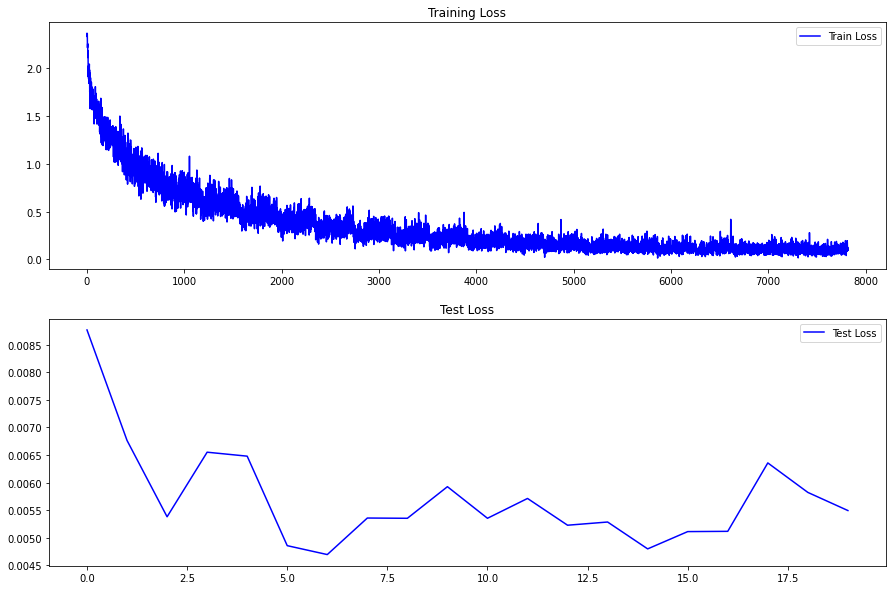

In [9]:
import matplotlib.pyplot as plt

train_losses = main.getTrainLoss()
test_losses = main.getTestLoss()
    
fig, axs = plt.subplots(2,1,figsize=(15,10))
axs[0].plot(train_losses, color='b', label='Train Loss')
axs[0].legend(loc="upper right")
axs[0].set_title("Training Loss")

axs[1].plot(test_losses, color='b', label='Test Loss')
axs[1].legend(loc="upper right")
axs[1].set_title("Test Loss")

fig.savefig('train_test_loss.jpg', bbox_inches='tight')


In [10]:
target_layers = [net.layer4[-1]]
print(target_layers)

[BasicBlock(
  (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (shortcut): Sequential()
)]


In [11]:
classes = ('Plane', 'Car', 'Bird', 'Cat', 'Deer',
           'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

In [12]:
import utils
m_tgt, m_pred_labels, m_images, m_gcam_images = utils.getMissMatchImages(net, target_layers)

<Figure size 432x288 with 0 Axes>

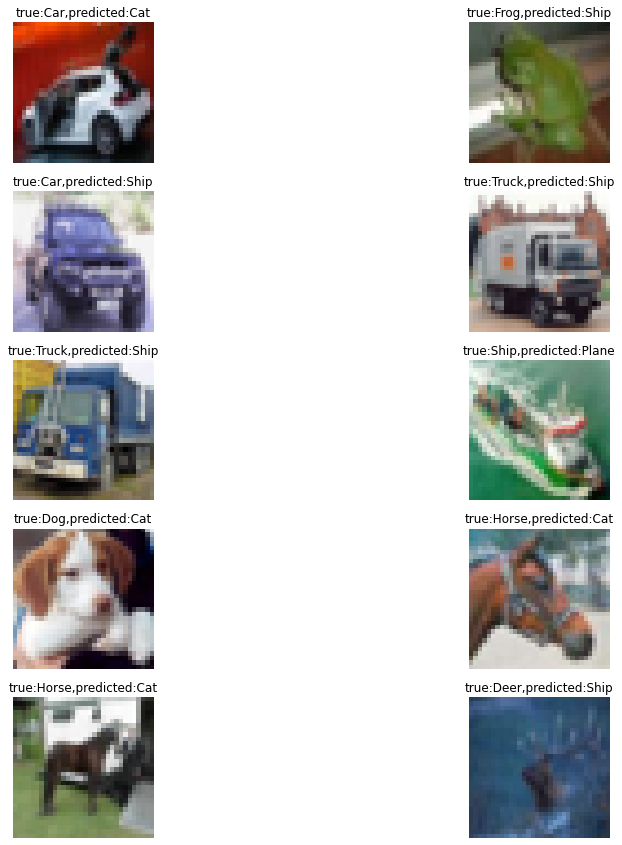

In [13]:
index = 0
figure = plt.figure()
plt.figure(figsize=(15,15))
num_of_images = 10
for index in range(1, num_of_images + 1):
    plt.subplot(5, 2, index)
    plt.axis('off')
    plt.gca().set_title('true:{0},predicted:{1}'.format(classes[m_tgt[index-1].item()], classes[m_pred_labels[index-1]]))
    plt.imshow(m_images[index-1], cmap='gray_r')

plt.savefig('missclassified.jpg', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

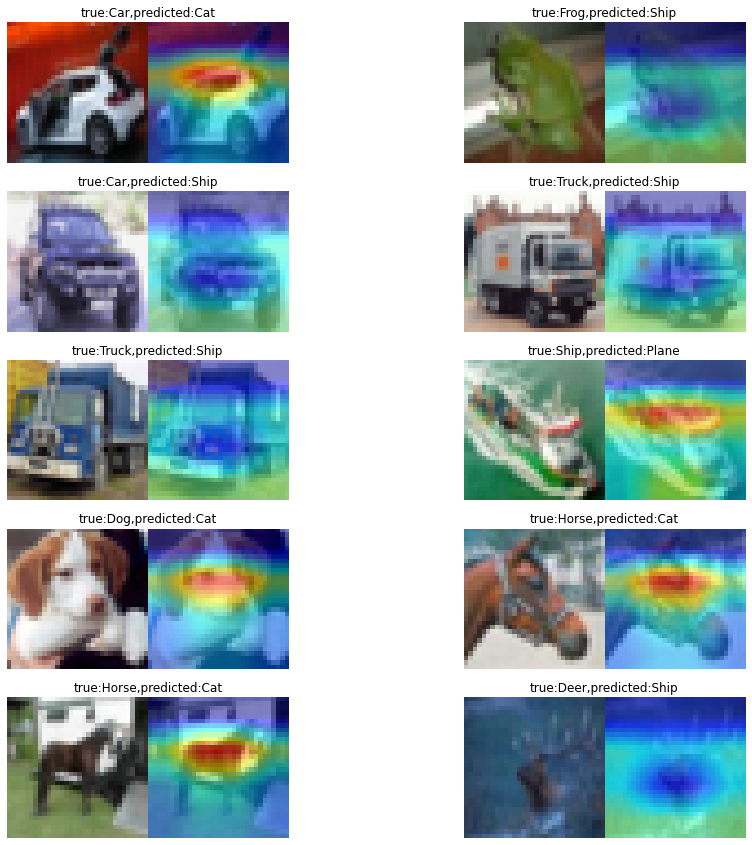

In [14]:
index = 0
figure = plt.figure()
plt.figure(figsize=(15,15))
num_of_images = 10
for index in range(1, num_of_images + 1):
    plt.subplot(5, 2, index)
    plt.axis('off')
    plt.gca().set_title('true:{0},predicted:{1}'.format(classes[m_tgt[index-1].item()], classes[m_pred_labels[index-1]]))
    plt.imshow(m_gcam_images[index-1], cmap='gray_r')

plt.savefig('missclassified_gradcam.jpg', bbox_inches='tight')